In [1]:
!pip install groclake==0.1.14

In [2]:
!pip install opencv-python-headless mediapipe matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 11.8 MB/s eta 0:00:00


In [3]:
import os
import inspect
from groclake.cataloglake import CatalogLake
from groclake.datalake import DataLake
from groclake.vectorlake import VectorLake
from groclake.modellake import ModelLake

In [4]:
os.environ['GROCLAKE_ACCOUNT_ID']='your_account_id'
os.environ['GROCLAKE_API_KEY']='your_api_key'

In [5]:

# Step 3: Initialize GrocLake modules
cataloglake = CatalogLake()  # Replace with actual API key
datalake = DataLake()    # Replace with actual API key
vectorlake = VectorLake()
modellake = ModelLake()


In [6]:
import time

# Define fetch request
product_fetch_request = {
    "groc_item_id": "",
    "groc_category": "",
    "is_in_stock": "",
    "page_size": "50",  # Adjust batch size if needed
    "page_number": "1"
}

groc_item_ids = []
all_fetched_items = []
found_10000 = False
max_pages = 100  # Limit the number of pages to avoid infinite loops

for page in range(1, max_pages + 1):
    product_fetch_request["page_number"] = str(page)
    catalog_fetch_product = cataloglake.fetch(product_fetch_request)

    if "items" not in catalog_fetch_product or not catalog_fetch_product["items"]:
        print("No more products to fetch.")
        break

    for item in catalog_fetch_product["items"]:
        item_id = int(item["groc_item_id"])  # Convert to integer for comparison
        if item_id > 10000:
            found_10000 = True
            groc_item_ids.append(item_id)
            all_fetched_items.append(item)
            print(f"{item_id} : {item['name']}")

    print(f"Processed page {page}, Total fetched: {len(all_fetched_items)}")

    # Stop fetching if we have found enough items
    if found_10000 and len(groc_item_ids) > 50:  # Adjust limit as needed
        break

    time.sleep(1)  # Prevent rate limiting

print("\nFinal fetched data:")
print(all_fetched_items)
print(f"Total items found after ID 10000: {len(all_fetched_items)}")

1304014170 : FashionBrand Navy Blue A-Line Dress with Belted Waist
1755439546 : FashionBrand Navy Blue A-line Dress with V-neck and Bishop Sleeves
2295903802 : FashionBrand Navy Blue Chiffon A-line Dress with Belted Waist and Bishop Sleeves
3329319615 : FashionBrand Navy Blue A-line Chiffon Dress with V-neck and Bishop Sleeves
2581383061 : FashionBrand Navy Blue Chiffon V-Neck Dress with Belted Waist
1966183158 : Navy Blue V-Neck Bishop Sleeve Dress with Waist Tie by FashionBrand
1611424271 : 
4471002195 : 
4471002195 : 
2296872511 : 
1592535138 : 
1844328611 : FashionBrand White Cotton A-Line Skirt with Embroidered Detail
3118846399 : FashionBrand White Cotton A-Line Skirt with Embroidered Detail
1985197659 : Turtle Men's Navy Blue Check Cotton Shirt with Roll-up Sleeves
3016261022 : Turtle Men's Navy Blue Check Cotton Casual Shirt with Roll-up Sleeves
2508656668 : Turtle Men's Navy Blue Check Cotton Shirt
9420329814 : Turtle Men's Navy Blue Checkered Cotton Shirt with Roll-up Sleeves

In [7]:
import pandas as pd

In [8]:
data_frame=pd.read_csv('/content/merged_data (1).csv')

In [9]:
data_frame.head()

filename                                               link     id gender  \
0  15970.jpg  http://assets.myntassets.com/v1/images/style/p...  15970    Men   
1  39386.jpg  http://assets.myntassets.com/v1/images/style/p...  39386    Men   
2  59263.jpg  http://assets.myntassets.com/v1/images/style/p...  59263  Women   
3  21379.jpg  http://assets.myntassets.com/v1/images/style/p...  21379    Men   
4  53759.jpg  http://assets.myntassets.com/v1/images/style/p...  53759    Men   

  masterCategory subCategory  articleType baseColour  season    year   usage  \
0        Apparel     Topwear       Shirts  Navy Blue    Fall  2011.0  Casual   
1        Apparel  Bottomwear        Jeans       Blue  Summer  2012.0  Casual   
2    Accessories     Watches      Watches     Silver  Winter  2016.0  Casual   
3        Apparel  Bottomwear  Track Pants      Black    Fall  2011.0  Casual   
4        Apparel     Topwear      Tshirts       Grey  Summer  2012.0  Casual   

                              productDisplayName  
0               Turtle Check Men Navy Blue Shirt  
1             Peter England Men Party Blue Jeans  
2                       Titan Women Silver Watch  
3  Manchester United Men Solid Black Track Pants  
4                          Puma Men Grey T-shirt

In [ ]:
# Step 1: Install Kaggle API if not already installed
!pip install kaggle

# Step 2: Upload your Kaggle API key (kaggle.json)
from google.colab import files
files.upload()  # Upload kaggle.json file

# Step 3: Move the kaggle.json file to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the dataset
!kaggle datasets download -d paramaggarwal/fashion-product-images-dataset

# Step 5: Unzip the dataset
!unzip fashion-product-images-dataset.zip -d fashion_dataset


In [10]:
import os
from groclake.cataloglake import CatalogLake

# Set your Groclake API key and account ID
os.environ['GROCLAKE_ACCOUNT_ID'] = "your_account_id"  # Replace with your Groclake account ID
os.environ['GROCLAKE_API_KEY'] = "your_api_key"  # Replace with your Groclake API key

# Initialize Cataloglake
cataloglake = CatalogLake()

def list_products_in_catalog():
    """
    Fetches and lists all products in the Cataloglake.
    """
    try:
        # Define the fetch request payload
        product_fetch_request = {
            "groc_item_id": "",  # Leave empty to fetch all products
            "groc_category": "",  # Optional: Filter by category
            "is_in_stock": "",  # Optional: Filter by stock availability
            "page_size": "20",  # Number of products per page
            "page_number": "1"  # Page number
        }

        # Fetch products from Cataloglake
        fetch_response = cataloglake.fetch(product_fetch_request)

        if not fetch_response or "items" not in fetch_response:
            print("No products found in the catalog.")
            return

        # Display the list of products
        print("Products in Cataloglake:")
        for index, product in enumerate(fetch_response["items"], start=1):
            print(f"{index}. Product ID: {product.get('groc_item_id', 'N/A')}")
            print(f"   Name: {product.get('name', 'N/A')}")
            print(f"   Category: {product.get('category', 'N/A')}")
            print(f"   Description: {product.get('description', 'N/A')}")
            print(f"   Images: {product.get('images', [])}")
            print(f"   Pricing: MRP: {product.get('pricing_info', {}).get('mrp', 'N/A')}, Sale Price: {product.get('pricing_info', {}).get('sale_price', 'N/A')}")
            print("-" * 50)

    except Exception as e:
        print(f"Error fetching products from Cataloglake: {e}")

# Run the function to list products
list_products_in_catalog()

Products in Cataloglake:
1. Product ID: 1304014170
   Name: FashionBrand Navy Blue A-Line Dress with Belted Waist
   Category: Dresses
   Description: Elegant navy blue dress with a belted waist and bishop sleeves, perfect for casual outings.
   Images: ['https://assets-cartesian.plotch.io/images/catalog_gen/3423196891/Red_Dress', '', '', '']
   Pricing: MRP: 0.0, Sale Price: 0.0
--------------------------------------------------
2. Product ID: 1755439546
   Name: FashionBrand Navy Blue A-line Dress with V-neck and Bishop Sleeves
   Category: Dresses
   Description: Elegant navy blue dress with V-neck and bishop sleeves, perfect for casual occasions.
   Images: ['https://assets-cartesian.plotch.io/images/catalog_gen/9540471049/Red_Dress', '', '', '']
   Pricing: MRP: 0.0, Sale Price: 0.0
--------------------------------------------------
3. Product ID: 2295903802
   Name: FashionBrand Navy Blue Chiffon A-line Dress with Belted Waist and Bishop Sleeves
   Category: Dresses
   Descriptio

In [11]:
!pip install cloudinary


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
import cloudinary
import cloudinary.uploader
import cloudinary.api

# Set up your Cloudinary credentials
cloudinary.config(
    cloud_name='cloud_name',  # Replace with your cloud name
    api_key='your_cloud_key',        # Replace with your API key
    api_secret='your_cloud_secret'   # Replace with your API secret
)

# Upload image
response = cloudinary.uploader.upload("/content/fashion_dataset/fashion-dataset/images/10000.jpg")

# Get the URL of the uploaded image
image_url = response['url']
print("Image uploaded successfully! URL:", image_url)


In [ ]:
import os
from groclake.cataloglake import CatalogLake

# Set up environment variables (GROCLAKE_ACCOUNT_ID and API key)
os.environ['GROCLAKE_ACCOUNT_ID'] = "your_account_id"  # Replace with your Groclake account ID
os.environ['GROCLAKE_API_KEY'] = "your_api_key"  # Replace with your Groclake API key

# Initialize CatalogLake with the existing catalog ID
cataloglake = CatalogLake()

# Existing catalog ID (as provided in the message)
catalog_id = "jj7t30h8eptc9bsc"

# Function to add a new product to the existing catalog
def add_clothes_to_existing_catalog():
    product_create_request = {
        "cataloglake_id": catalog_id,  # Use the existing catalog ID
        "product_name_hint": "FashionBrand White Cotton A-Line Skirt with Embroidered Detail",
        "category_name_hint": "Skirts",
        "provider_name_hint": "FashionBrand",
        "images": [
            {
                "image_name": "white skirt",
                "image_url": "https://assets-cartesian.plotch.io/images/catalog_gen/1458887405/white_skirt"
            }
        ],
        "product_description": "A stylish white cotton skirt with embroidered detail, perfect for casual summer outings.",
        "product_benefits": "Breathable fabric, comfortable fit",
        "product_highlights": "Elegant embroidery",
        "pattern": "Solid",
        "material": "Cotton",
        "fit_type": "Regular",
        "occasion": "Casual",
        "shape": "A-Line",
        "colour_name": "White",
        "colour": "#FFFFFF",
        "seasons": "Summer",
        "gender": "female"
    }
    product = cataloglake.gen(product_create_request)
    print("Product added: ", product)

# Call the function to add the product to the existing catalog
add_clothes_to_existing_catalog()


In [ ]:
def fetch_product_by_id(product_id):
    """
    Fetches a product from Cataloglake by product ID.
    """
    try:
        product_fetch_request = {
            "groc_item_id": product_id,  # Use product ID to fetch a specific product
        }

        fetch_response = cataloglake.fetch(product_fetch_request)

        if not fetch_response or "items" not in fetch_response or not fetch_response["items"]:
            print(f"❌ Product with ID {product_id} not found in the catalog.")
            return

        # Display the product details
        product = fetch_response["items"][0]
        print(f"Product details for ID {product_id}:")
        print(f"   Name: {product.get('name', 'N/A')}")
        print(f"   Category: {product.get('category', 'N/A')}")
        print(f"   Description: {product.get('description', 'N/A')}")
        print(f"   Images: {product.get('images', [])}")
        print(f"   Pricing: MRP: {product.get('pricing_info', {}).get('mrp', 'N/A')}, Sale Price: {product.get('pricing_info', {}).get('sale_price', 'N/A')}")
        print("-" * 50)

    except Exception as e:
        print(f"Error fetching product with ID {product_id}: {e}")

# Step 1: Create Catalog
catalog = create_catalog()

# Step 2: Create Product
if catalog:
    product_response = create_product()

    if product_response:
        product_id = product_response.get("groc_item_id")  # Get the product ID from the response
        if product_id:
            fetch_product_by_id(product_id)  # Use the correct product ID to fetch
        else:
            print("❌ Product ID not found in the creation response.")

In [16]:
import os
from groclake.cataloglake import CatalogLake

# Set your Groclake API key and account ID
os.environ['GROCLAKE_ACCOUNT_ID'] = "your_account_id"  # Replace with your Groclake account ID
os.environ['GROCLAKE_API_KEY'] = "your_api_key"  # Replace with your Groclake API key

# Initialize Cataloglake
cataloglake = CatalogLake()

def create_or_get_catalog():
    """
    Creates a new catalog if it does not exist, or fetches the existing catalog.
    """
    try:
        cataloglake_create_payload = {
            "cataloglake_name": "cloth_trying"
        }

        groclake_catalog = cataloglake.create(cataloglake_create_payload)

        # Check if catalog was created or already exists
        if 'cataloglake_id' in groclake_catalog:
            print(f"Catalog Created: {groclake_catalog['cataloglake_name']} with ID: {groclake_catalog['cataloglake_id']}")
        else:
            print(f"Catalog already exists. Found catalog with ID: {groclake_catalog['cataloglake_id']}")


        return groclake_catalog['cataloglake_id']
    except Exception as e:
        print(f"Error creating or fetching catalog: {e}")
        return None

def create_product(cataloglake_id):
    """
    Creates a new product in Cataloglake under the specified catalog.
    """
    try:
        product_create_request = {
            "cataloglake_id": cataloglake_id,  # Assign the existing catalog ID
            "product_name_hint": "Nightsuit Shirt And Pants",
            "category_name_hint": "Nightsuit",
            "provider_name_hint": "Breathables",
            "images": [
                {
                    "image_name": "Nightsuit image",
                    "image_url": "https://res.cloudinary.com/dsb9enc9p/image/upload/v1738478699/teymv6rlyzkakgy2n4r0.jpg"
                }
            ]
        }

        groclake_create_product = cataloglake.gen(product_create_request)

        if 'groc_item_id' in groclake_create_product:
            print(f"Product Created: {groclake_create_product['image_link']} with ID: {groclake_create_product['groc_item_id']}")
            return groclake_create_product
        else:
            print("Error: Product creation failed or returned empty data.")
            return None
    except Exception as e:
        print(f"Error creating product: {e}")
        return None

def fetch_product_by_id(product_id):
    """
    Fetches a product from Cataloglake by product ID.
    """
    try:
        product_fetch_request = {
            "groc_item_id": product_id,
        }

        fetch_response = cataloglake.fetch(product_fetch_request)

        if not fetch_response or "items" not in fetch_response or not fetch_response["items"]:
            print(f"❌ Product with ID {product_id} not found in the catalog.")
            return

        product = fetch_response["items"][0]
        print(f"Product details for ID {product_id}:")
        print(f"   Name: {product.get('name', 'N/A')}")
        print(f"   Category: {product.get('category', 'N/A')}")
        print(f"   Description: {product.get('description', 'N/A')}")
        print(f"   Images: {product.get('images', [])}")
        print(f"   Pricing: MRP: {product.get('pricing_info', {}).get('mrp', 'N/A')}, Sale Price: {product.get('pricing_info', {}).get('sale_price', 'N/A')}")
        print("-" * 50)

    except Exception as e:
        print(f"Error fetching product with ID {product_id}: {e}")

# Step 1: Get or Create Catalog
catalog_id = create_or_get_catalog()

# Step 2: Create Product in the fetched or created catalog
if catalog_id:
    product = create_product(catalog_id)

# Step 3: Fetch the product by ID if available
if product:
    product_id = product['groc_item_id']  # Use the groc_item_id from the created product response
    fetch_product_by_id(product_id)

Catalog Created: virtual_tryon_catalog with ID: jj7t30h8eptc9bsc
Product Created: https://assets-cartesian.plotch.io/images/catalog_gen/6067955969/Nightsuit_image with ID: 3049232183
❌ Product with ID 3049232183 not found in the catalog.


In [17]:
import os
from groclake.cataloglake import CatalogLake

# Set your Groclake API key and account ID
os.environ['GROCLAKE_ACCOUNT_ID'] = "your_account_id"  # Replace with your Groclake account ID
os.environ['GROCLAKE_API_KEY'] = "your_api_key"  # Replace with your Groclake API key

cataloglake = CatalogLake()

def create_or_get_catalog():
    """
    Creates a new catalog if it does not exist, or fetches the existing catalog.
    """
    try:
        cataloglake_create_payload = {
            "cataloglake_name": "virtual_tryon_catalog"
        }

        groclake_catalog = cataloglake.create(cataloglake_create_payload)

        # Check if catalog was created or already exists
        if 'cataloglake_id' in groclake_catalog:
            print(f"Catalog Created: {groclake_catalog['cataloglake_name']} with ID: {groclake_catalog['cataloglake_id']}")
        else:
            print(f"Catalog already exists. Found catalog with ID: {groclake_catalog['cataloglake_id']}")

        return groclake_catalog['cataloglake_id']
    except Exception as e:
        print(f"Error creating or fetching catalog: {e}")
        return None

def create_product(cataloglake_id):
    """
    Creates a new product in Cataloglake under the specified catalog.
    """
    try:
        product_create_request = {
            "cataloglake_id": cataloglake_id,  # Assign the existing catalog ID
            "product_name_hint": "Nightsuit Shirt And Pants",
            "category_name_hint": "Nightsuit",
            "provider_name_hint": "Breathables",
            "images": [
                {
                    "image_name": "Nightsuit image",
                    "image_url": "https://res.cloudinary.com/dsb9enc9p/image/upload/v1738478699/teymv6rlyzkakgy2n4r0.jpg"
                }
            ]
        }

        groclake_create_product = cataloglake.gen(product_create_request)

        # Print the full response to debug and check the returned data
        print("Product creation response:", groclake_create_product)

        if 'groc_item_id' in groclake_create_product:
            print(f"Product Created: {groclake_create_product['image_link']} with ID: {groclake_create_product['groc_item_id']}")
            return groclake_create_product
        else:
            print("Error: Product creation failed or returned empty data.")
            return None
    except Exception as e:
        print(f"Error creating product: {e}")
        return None

def fetch_product_by_id(product_id):
    """
    Fetches a product from Cataloglake by product ID.
    """
    try:
        product_fetch_request = {
            "groc_item_id": product_id,
        }

        fetch_response = cataloglake.fetch(product_fetch_request)

        if not fetch_response or "items" not in fetch_response or not fetch_response["items"]:
            print(f"❌ Product with ID {product_id} not found in the catalog.")
            return

        product = fetch_response["items"][0]
        print(f"Product details for ID {product_id}:")
        print(f"   Name: {product.get('name', 'N/A')}")
        print(f"   Category: {product.get('category', 'N/A')}")
        print(f"   Description: {product.get('description', 'N/A')}")
        print(f"   Images: {product.get('images', [])}")
        print(f"   Pricing: MRP: {product.get('pricing_info', {}).get('mrp', 'N/A')}, Sale Price: {product.get('pricing_info', {}).get('sale_price', 'N/A')}")
        print("-" * 50)

    except Exception as e:
        print(f"Error fetching product with ID {product_id}: {e}")

# Step 1: Get or Create Catalog
catalog_id = create_or_get_catalog()

# Step 2: Create Product in the fetched or created catalog
if catalog_id:
    product = create_product(catalog_id)

# Step 3: Fetch the product by ID if available
if product:
    # Print the full product object and check if `groc_item_id` is available
    print("Created Product Response:", product)

    if 'groc_item_id' in product:
        product_id = product['groc_item_id']
        fetch_product_by_id(product_id)
    else:
        print("No valid product ID returned for fetching.")

Catalog Created: virtual_tryon_catalog with ID: jj7t30h8eptc9bsc
Product creation response: {'error': 'the JSON object must be str, bytes or bytearray, not NoneType', 'gen_product_id': 67095660510, 'image_link': 'https://assets-cartesian.plotch.io/images/catalog_gen/0670956605/Nightsuit_image', 'image_name': 'Nightsuit image', 'groc_item_id': '2364688544'}
Product Created: https://assets-cartesian.plotch.io/images/catalog_gen/0670956605/Nightsuit_image with ID: 2364688544
Created Product Response: {'error': 'the JSON object must be str, bytes or bytearray, not NoneType', 'gen_product_id': 67095660510, 'image_link': 'https://assets-cartesian.plotch.io/images/catalog_gen/0670956605/Nightsuit_image', 'image_name': 'Nightsuit image', 'groc_item_id': '2364688544'}
❌ Product with ID 2364688544 not found in the catalog.


In [18]:
import os
from groclake.cataloglake import CatalogLake

# Set your Groclake API key and account ID
os.environ['GROCLAKE_ACCOUNT_ID'] = "your_account_id"  # Replace with your Groclake account ID
os.environ['GROCLAKE_API_KEY'] = "your_api_key"  # Replace with your Groclake API key

# Initialize Cataloglake
cataloglake = CatalogLake()

def create_or_get_catalog():
    """
    Creates a new catalog if it does not exist, or fetches the existing catalog.
    """
    try:
        cataloglake_create_payload = {
            "cataloglake_name": "virtual_tryon_catalog"
        }

        groclake_catalog = cataloglake.create(cataloglake_create_payload)

        # Check if catalog was created or already exists
        if 'cataloglake_id' in groclake_catalog:
            print(f"Catalog Created: {groclake_catalog['cataloglake_name']} with ID: {groclake_catalog['cataloglake_id']}")
        else:
            print(f"Catalog already exists. Found catalog with ID: {groclake_catalog['cataloglake_id']}")

        return groclake_catalog['cataloglake_id']
    except Exception as e:
        print(f"Error creating or fetching catalog: {e}")
        return None

def create_product(cataloglake_id):
    """
    Creates a new product in Cataloglake under the specified catalog.
    """
    try:
        product_create_request = {
            "cataloglake_id": cataloglake_id,  # Assign the existing catalog ID
            "product_name_hint": "Nightsuit Shirt And Pants",
            "category_name_hint": "Nightsuit",
            "provider_name_hint": "Breathables",
            "images": [
                {
                    "image_name": "Nightsuit image",
                    "image_url": "https://res.cloudinary.com/dsb9enc9p/image/upload/v1738478699/teymv6rlyzkakgy2n4r0.jpg"
                }
            ],
            "description": "A comfortable nightsuit set including a shirt and pants.",
            "pricing_info": {
                "mrp": 999,
                "sale_price": 799
            }
        }

        # Make the API call to create the product
        groclake_create_product = cataloglake.gen(product_create_request)

        # Print the full response for debugging
        print("Product creation response:", groclake_create_product)

        if 'groc_item_id' in groclake_create_product:
            print(f"Product Created: {groclake_create_product['image_link']} with ID: {groclake_create_product['groc_item_id']}")
            return groclake_create_product
        else:
            print("Error: Product creation failed or returned empty data.")
            return None
    except Exception as e:
        print(f"Error creating product: {e}")
        return None

def fetch_product_by_id(product_id):
    """
    Fetches a product from Cataloglake by product ID.
    """
    try:
        product_fetch_request = {
            "groc_item_id": product_id,
        }

        fetch_response = cataloglake.fetch(product_fetch_request)

        if not fetch_response or "items" not in fetch_response or not fetch_response["items"]:
            print(f"❌ Product with ID {product_id} not found in the catalog.")
            return

        product = fetch_response["items"][0]
        print(f"Product details for ID {product_id}:")
        print(f"   Name: {product.get('name', 'N/A')}")
        print(f"   Category: {product.get('category', 'N/A')}")
        print(f"   Description: {product.get('description', 'N/A')}")
        print(f"   Images: {product.get('images', [])}")
        print(f"   Pricing: MRP: {product.get('pricing_info', {}).get('mrp', 'N/A')}, Sale Price: {product.get('pricing_info', {}).get('sale_price', 'N/A')}")
        print("-" * 50)

    except Exception as e:
        print(f"Error fetching product with ID {product_id}: {e}")

# Step 1: Get or Create Catalog
catalog_id = create_or_get_catalog()

# Step 2: Create Product in the fetched or created catalog
if catalog_id:
    product = create_product(catalog_id)

# Step 3: Fetch the product by ID if available
if product:
    # Print the full product object and check if `groc_item_id` is available
    print("Created Product Response:", product)

    if 'groc_item_id' in product:
        product_id = product['groc_item_id']
        fetch_product_by_id(product_id)
    else:
        print("No valid product ID returned for fetching.")


Catalog Created: virtual_tryon_catalog with ID: jj7t30h8eptc9bsc
Product creation response: {'error': 'the JSON object must be str, bytes or bytearray, not NoneType', 'gen_product_id': 580212978310, 'image_link': 'https://assets-cartesian.plotch.io/images/catalog_gen/5802129783/Nightsuit_image', 'image_name': 'Nightsuit image', 'groc_item_id': '2955604342'}
Product Created: https://assets-cartesian.plotch.io/images/catalog_gen/5802129783/Nightsuit_image with ID: 2955604342
Created Product Response: {'error': 'the JSON object must be str, bytes or bytearray, not NoneType', 'gen_product_id': 580212978310, 'image_link': 'https://assets-cartesian.plotch.io/images/catalog_gen/5802129783/Nightsuit_image', 'image_name': 'Nightsuit image', 'groc_item_id': '2955604342'}
❌ Product with ID 2955604342 not found in the catalog.


In [19]:
import os
from groclake.cataloglake import CatalogLake

# Set up environment variables (GROCLAKE_ACCOUNT_ID and API key)
os.environ['GROCLAKE_ACCOUNT_ID'] = "your_account_id"  # Replace with your Groclake account ID
os.environ['GROCLAKE_API_KEY'] = "your_api_key"  # Replace with your Groclake API key

# Initialize CatalogLake with the existing catalog ID
cataloglake = CatalogLake()

# Existing catalog ID (as provided in the message)
catalog_id = "jj7t30h8eptc9bsc"

def find_recently_added_product():
    """
    Fetches and finds the recently added 'white skirt' in the catalog.
    """
    try:
        # Define the fetch request payload
        product_fetch_request = {
            "cataloglake_id": catalog_id,  # Use the existing catalog ID
            "page_size": "20",  # Number of products per page
            "page_number": "1"  # Fetch the first page of products
        }

        # Fetch products from Cataloglake
        fetch_response = cataloglake.fetch(product_fetch_request)

        if not fetch_response or "items" not in fetch_response:
            print("No products found in the catalog.")
            return

        # Search for the specific product by name or description
        white_skirt = None
        for product in fetch_response["items"]:
            # Check for the specific product name or description
            if "FashionBrand White Cotton A-Line Skirt with Embroidered Detail" in product.get("name", ""):
                white_skirt = product
                break

        if white_skirt:
            print("Found the 'White Skirt' Product:")
            print(f"Product ID: {white_skirt.get('groc_item_id', 'N/A')}")
            print(f"Name: {white_skirt.get('name', 'N/A')}")
            print(f"Category: {white_skirt.get('category', 'N/A')}")
            print(f"Description: {white_skirt.get('description', 'N/A')}")
            print(f"Images: {white_skirt.get('images', [])}")
            print(f"Pricing: MRP: {white_skirt.get('pricing_info', {}).get('mrp', 'N/A')}, Sale Price: {white_skirt.get('pricing_info', {}).get('sale_price', 'N/A')}")
            print("-" * 50)
        else:
            print("The 'White Skirt' product not found in the catalog.")

    except Exception as e:
        print(f"Error fetching products from Cataloglake: {e}")

# Call the function to find the 'white skirt' product
find_recently_added_product()


Found the 'White Skirt' Product:
Product ID: 1844328611
Name: FashionBrand White Cotton A-Line Skirt with Embroidered Detail
Category: Skirts
Description: A stylish white cotton skirt with embroidered detail, perfect for casual summer outings.
Images: ['https://assets-cartesian.plotch.io/images/catalog_gen/1458887405/white_skirt', '', '', '']
Pricing: MRP: 0.0, Sale Price: 0.0
--------------------------------------------------


In [20]:
payload = {
  "items": [
    {
      "groc_item_id": "1592535138"
    }
  ]
}

catalog_inventory = CatalogLake().fetch_inventory(payload)
print("catalog_inventory",  catalog_inventory)

catalog_inventory {'catalog_inventory_fetch_request_id': 'd0ad6119-2d6b-45cd-8669-af3ff7a04012', 'items': [{'groc_item_id': 1592535138.0, 'inventory_info': {'qty': 0.0, 'min_qty': 0.0, 'max_qty': 0.0, 'is_in_stock': 0}}]}


In [21]:
import os
from groclake.cataloglake import CatalogLake

# Set your Groclake API key and account ID
os.environ['GROCLAKE_ACCOUNT_ID'] = "your_account_id"  # Replace with your Groclake account ID
os.environ['GROCLAKE_API_KEY'] = "your_api_key"  # Replace with your Groclake API key

# Initialize Cataloglake
cataloglake = CatalogLake()

def list_products_in_catalog():
    """
    Fetches and lists all products in the Cataloglake.
    """
    try:
        # Define the fetch request payload
        product_fetch_request = {
            "groc_item_id": "",  # Leave empty to fetch all products
            "groc_category": "",  # Optional: Filter by category
            "is_in_stock": "",  # Optional: Filter by stock availability
            "page_size": "20",  # Number of products per page
            "page_number": "1"  # Page number
        }

        # Fetch products from Cataloglake
        fetch_response = cataloglake.fetch(product_fetch_request)

        if not fetch_response or "items" not in fetch_response:
            print("No products found in the catalog.")
            return

        # Display the list of products
        print("Products in Cataloglake:")
        for index, product in enumerate(fetch_response["items"], start=1):
            print(f"{index}. Product ID: {product.get('groc_item_id', 'N/A')}")
            print(f"   Name: {product.get('name', 'N/A')}")
            print(f"   Category: {product.get('category', 'N/A')}")
            print(f"   Description: {product.get('description', 'N/A')}")
            print(f"   Images: {product.get('images', [])}")
            print(f"   Pricing: MRP: {product.get('pricing_info', {}).get('mrp', 'N/A')}, Sale Price: {product.get('pricing_info', {}).get('sale_price', 'N/A')}")
            print("-" * 50)

    except Exception as e:
        print(f"Error fetching products from Cataloglake: {e}")

# Run the function to list products
list_products_in_catalog()

Products in Cataloglake:
1. Product ID: 1304014170
   Name: FashionBrand Navy Blue A-Line Dress with Belted Waist
   Category: Dresses
   Description: Elegant navy blue dress with a belted waist and bishop sleeves, perfect for casual outings.
   Images: ['https://assets-cartesian.plotch.io/images/catalog_gen/3423196891/Red_Dress', '', '', '']
   Pricing: MRP: 0.0, Sale Price: 0.0
--------------------------------------------------
2. Product ID: 1755439546
   Name: FashionBrand Navy Blue A-line Dress with V-neck and Bishop Sleeves
   Category: Dresses
   Description: Elegant navy blue dress with V-neck and bishop sleeves, perfect for casual occasions.
   Images: ['https://assets-cartesian.plotch.io/images/catalog_gen/9540471049/Red_Dress', '', '', '']
   Pricing: MRP: 0.0, Sale Price: 0.0
--------------------------------------------------
3. Product ID: 2295903802
   Name: FashionBrand Navy Blue Chiffon A-line Dress with Belted Waist and Bishop Sleeves
   Category: Dresses
   Descriptio

In [22]:
!pip install cvnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cvnn: filename=cvnn-2.0-py2.py3-none-any.whl size=47611 sha256=66e42e20cdbe54942111933d88d493316328aa869cb7681709007ebf92587c0e
  Stored in directory: /root/.cache/pip/wheels/96/5b/85/dbfd5c1f8248d22343620491e55b1b19f7337b0763088a948f
Successfully built cvnn


In [23]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# My library!
from cvnn import layers

print(tf.__version__)

2.18.0


In [24]:
import requests

def check_link_status(link):
    url = f"https://assets-cartesian.plotch.io/images/catalog_gen/{link}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            print(f"The link {url} is working and accessible!")
        else:
            print(f"The link {url} returned status code {response.status_code}.")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while trying to access {url}: {e}")

# Test the link
link = "4285fab0-751a-4b74-8e9b-43af05deee22"
check_link_status(link)


The link https://assets-cartesian.plotch.io/images/catalog_gen/4285fab0-751a-4b74-8e9b-43af05deee22 returned status code 403.


In [25]:
import os
from groclake.cataloglake import CatalogLake

# Set up environment variables (GROCLAKE_ACCOUNT_ID and API key)
os.environ['GROCLAKE_ACCOUNT_ID'] = "your_account_id"  # Replace with your Groclake account ID
os.environ['GROCLAKE_API_KEY'] = "your_api_key"  # Replace with your Groclake API key

# Initialize CatalogLake with the existing catalog ID
cataloglake = CatalogLake()

# Existing catalog ID (as provided in the message)
catalog_id = "jj7t30h8eptc9bsc"

def find_recently_added_product():
    """
    Fetches and finds the recently added 'white skirt' in the catalog.
    """
    try:
        # Define the fetch request payload
        product_fetch_request = {
            "cataloglake_id": catalog_id,  # Use the existing catalog ID
            "page_size": "20",  # Number of products per page
            "page_number": "1"  # Fetch the first page of products
        }

        # Fetch products from Cataloglake
        fetch_response = cataloglake.fetch(product_fetch_request)

        if not fetch_response or "items" not in fetch_response:
            print("No products found in the catalog.")
            return

        # Search for the specific product by name or description
        white_skirt = None
        for product in fetch_response["items"]:
            # Check for the specific product name or description
            if "FashionBrand White Cotton A-Line Skirt with Embroidered Detail" in product.get("name", ""):
                white_skirt = product
                break

        if white_skirt:
            print("Found the 'White Skirt' Product:")
            print(f"Product ID: {white_skirt.get('groc_item_id', 'N/A')}")
            print(f"Name: {white_skirt.get('name', 'N/A')}")
            print(f"Category: {white_skirt.get('category', 'N/A')}")
            print(f"Description: {white_skirt.get('description', 'N/A')}")
            print(f"Images: {white_skirt.get('images', [])}")
            print(f"Pricing: MRP: {white_skirt.get('pricing_info', {}).get('mrp', 'N/A')}, Sale Price: {white_skirt.get('pricing_info', {}).get('sale_price', 'N/A')}")
            print("-" * 50)
        else:
            print("The 'White Skirt' product not found in the catalog.")

    except Exception as e:
        print(f"Error fetching products from Cataloglake: {e}")

# Call the function to find the 'white skirt' product
find_recently_added_product()


Found the 'White Skirt' Product:
Product ID: 1844328611
Name: FashionBrand White Cotton A-Line Skirt with Embroidered Detail
Category: Skirts
Description: A stylish white cotton skirt with embroidered detail, perfect for casual summer outings.
Images: ['https://assets-cartesian.plotch.io/images/catalog_gen/1458887405/white_skirt', '', '', '']
Pricing: MRP: 0.0, Sale Price: 0.0
--------------------------------------------------


In [27]:
import os
import pandas as pd
from groclake.cataloglake import CatalogLake

class CatalogUploader:
    def __init__(self, api_key, account_id):
        """Initialize the CatalogUploader with API credentials."""
        os.environ['GROCLAKE_ACCOUNT_ID'] = "your_account_id"  # Replace with your Groclake account ID
        os.environ['GROCLAKE_API_KEY'] = "your_api_key"  # Replace with your Groclake API key

        self.cataloglake = CatalogLake()

    def create_catalog_if_not_exists(self, catalog_name="fashion_catalog"):
        """Create a new catalog if it doesn't exist."""
        try:
            cataloglake_create_payload = {
                "cataloglake_name": catalog_name
            }
            catalog = self.cataloglake.create(cataloglake_create_payload)
            print(f"Created new catalog: {catalog}")
            return catalog
        except Exception as e:
            print(f"Catalog might already exist or error occurred: {e}")
            return None

    def process_product_data(self, row):
        """Convert a DataFrame row into a product object."""
        product_name = row['productDisplayName']

        # Create a descriptive string from available attributes
        description = (f"{row['gender']}'s {row['articleType']} - "
                      f"{row['baseColour']} {row['subCategory']} for {row['usage']} wear. "
                      f"Season: {row['season']} {row['year']}")

        # Convert product data to Groclake format
        return {
            "client_item_id": str(row['id']),
            "groc_category": row['masterCategory'].upper(),
            "groc_category_id": str(hash(row['masterCategory']) % 10000),  # Simple hash for category ID
            "product_type": "simple",
            "name": product_name,
            "description": description,
            "short_description": description[:100] + "..." if len(description) > 100 else description,
            "category": row['subCategory'],
            "inventory_info": {
                "qty": "100",
                "min_qty": "1",
                "max_qty": "10",
                "is_in_stock": "1"
            },
            "pricing_info": {
                "mrp": "999.00",  # Example price since not in dataset
                "sale_price": "799.00",
            },
            "images": [row['link']],
            "attributes": {
                "gender": row['gender'],
                "season": row['season'],
                "usage": row['usage'],
                "colour": row['baseColour'],
                "category": row['masterCategory'],
                "subcategory": row['subCategory'],
                "article_type": row['articleType'],
                "year": str(row['year'])
            }
        }

    def upload_products(self, df, batch_size=50):
        """Upload products from DataFrame in batches."""
        total_products = len(df)
        successful_uploads = 0

        for i in range(0, total_products, batch_size):
            batch_df = df.iloc[i:i + batch_size]
            batch_products = []

            for _, row in batch_df.iterrows():
                try:
                    product_data = self.process_product_data(row)
                    batch_products.append(product_data)
                except Exception as e:
                    print(f"Error processing product {row['id']}: {e}")
                    continue

            if batch_products:
                try:
                    product_object = {"items": batch_products}
                    response = self.cataloglake.push(product_object)
                    successful_uploads += len(batch_products)
                    print(f"Uploaded batch {i//batch_size + 1}, Progress: {successful_uploads}/{total_products}")
                except Exception as e:
                    print(f"Error uploading batch starting at index {i}: {e}")

        return successful_uploads

# Example usage in Colab
from google.colab import userdata

def main():
    # Get credentials from Colab userdata
    account_id = 'account_grocklake_id'
    api_key = 'account_api_key'

    # Initialize uploader
    uploader = CatalogUploader(api_key, account_id)

    # Create catalog
    uploader.create_catalog_if_not_exists()

    # Read the dataset
    # Assuming the dataset is uploaded to Colab
    df = pd.read_csv('/content/merged_data (1).csv')

    # Upload products
    successful_uploads = uploader.upload_products(df)
    print(f"Successfully uploaded {successful_uploads} products")

if __name__ == "__main__":
    main()

Created new catalog: {'message': 'Cataloglake with same name already exists in this account.', 'cataloglake_id': 'jj7t30h8eptc9bsc', 'cataloglake_name': 'virtual_tryon_catalog'}
Uploaded batch 1, Progress: 50/44424
Uploaded batch 2, Progress: 100/44424


KeyboardInterrupt: 

In [28]:
import os
import pandas as pd
from groclake.cataloglake import CatalogLake

class TopCatalogItemsFetcher:
    def __init__(self):
        """Initialize with Groclake credentials"""
        os.environ['GROCLAKE_ACCOUNT_ID'] = "your_account_id"  # Replace with your Groclake account ID
        os.environ['GROCLAKE_API_KEY'] = "your_api_key"  # Replace with your Groclake API key

        self.cataloglake = CatalogLake()

    def fetch_top_items(self, top_n=50):
        """Fetch top N items from the catalog"""
        fetch_request = {
            "groc_item_id": "",
            "groc_category": "",
            "is_in_stock": "",
            "page_size": str(top_n),
            "page_number": "1"
        }

        try:
            response = self.cataloglake.fetch(fetch_request)
            items = response.get('items', [])

            processed_items = []
            for item in items:
                try:
                    # Fetch additional details for each item
                    inventory_data = self.fetch_inventory_details(item['groc_item_id'])
                    price_data = self.fetch_price_details(item['groc_item_id'])

                    # Combine all details
                    processed_item = {
                        'Item ID': item.get('groc_item_id', 'N/A'),
                        'Name': item.get('name', 'N/A'),
                        'Category': item.get('category', 'N/A'),
                        'Description': item.get('description', 'N/A'),
                        'Product Type': item.get('product_type', 'N/A'),
                        'Image URL': item.get('images', ['N/A'])[0],
                        'Quantity': inventory_data.get('qty', 'N/A'),
                        'In Stock': inventory_data.get('is_in_stock', 'N/A'),
                        'MRP': price_data.get('mrp', 'N/A'),
                        'Sale Price': price_data.get('sale_price', 'N/A'),
                        'Gender': item.get('attributes', {}).get('gender', 'N/A'),
                        'Color': item.get('attributes', {}).get('colour', 'N/A')
                    }
                    processed_items.append(processed_item)

                except Exception as e:
                    print(f"Error processing item {item.get('groc_item_id')}: {e}")

            return processed_items

        except Exception as e:
            print(f"Error fetching top items: {e}")
            return []

    def fetch_inventory_details(self, groc_item_id):
        """Fetch inventory details for a specific item"""
        try:
            inventory_request = {
                "items": [{"groc_item_id": groc_item_id}]
            }
            inventory_data = self.cataloglake.fetch_inventory(inventory_request)
            return inventory_data.get('items', [{}])[0]
        except Exception as e:
            print(f"Error fetching inventory for {groc_item_id}: {e}")
            return {}

    def fetch_price_details(self, groc_item_id):
        """Fetch price details for a specific item"""
        try:
            price_request = {
                "items": [{"groc_item_id": groc_item_id}]
            }
            price_data = self.cataloglake.fetch_price(price_request)
            return price_data.get('items', [{}])[0]
        except Exception as e:
            print(f"Error fetching price for {groc_item_id}: {e}")
            return {}

    def display_top_items(self, top_items):
        """Display top items in a formatted manner"""
        df = pd.DataFrame(top_items)
        print("\n--- Top 10 Catalog Items ---")
        print(df.to_string(index=False))

        return df

def main():
    # Initialize fetcher
    fetcher = TopCatalogItemsFetcher()

    # Fetch top 10 items
    top_items = fetcher.fetch_top_items(top_n=10)

    # Display top items
    df = fetcher.display_top_items(top_items)

    return df

if __name__ == "__main__":
    result_df = main()


--- Top 10 Catalog Items ---
   Item ID                                                                             Name Category                                                                                           Description Product Type                                                                        Image URL Quantity In Stock MRP Sale Price Gender Color
1304014170                            FashionBrand Navy Blue A-Line Dress with Belted Waist  Dresses           Elegant navy blue dress with a belted waist and bishop sleeves, perfect for casual outings.       simple       https://assets-cartesian.plotch.io/images/catalog_gen/3423196891/Red_Dress      N/A      N/A N/A        N/A    N/A   N/A
1755439546               FashionBrand Navy Blue A-line Dress with V-neck and Bishop Sleeves  Dresses                 Elegant navy blue dress with V-neck and bishop sleeves, perfect for casual occasions.       simple       https://assets-cartesian.plotch.io/images/catalog_gen/95404710

In [29]:
import os
import pandas as pd
from groclake.cataloglake import CatalogLake
from datetime import datetime

def fetch_items_by_category(self, category, num_items=100):
    """
    Fetch items from the catalog by specific category with flexible matching

    Args:
        category (str): The category of products to search for
        num_items (int, optional): Maximum number of items to return. Defaults to 100.

    Returns:
        list: List of products matching the specified category
    """
    matched_category_items = []
    page_number = 1

    # Normalize input category
    category = category.lower().strip()

    while len(matched_category_items) < num_items:
        fetch_request = {
            "groc_item_id": "",
            "groc_category": "",  # Leave empty to fetch all items
            "is_in_stock": "",
            "page_size": "100",
            "page_number": str(page_number)
        }

        try:
            response = self.cataloglake.fetch(fetch_request)
            items = response.get('items', [])

            if not items:
                break

            for item in items:
                try:
                    # Get item category and normalize
                    item_category = str(item.get('category', '')).lower().strip()

                    # Flexible matching conditions
                    category_match = (
                        category in item_category or
                        item_category.startswith(category) or
                        category in item_category.split() or
                        category == item_category
                    )

                    if category_match:
                        enriched_item = self._enrich_item_details(item)
                        matched_category_items.append(enriched_item)

                        # Break if we've reached the desired number of items
                        if len(matched_category_items) >= num_items:
                            break

                except Exception as e:
                    print(f"Error processing item {item.get('groc_item_id')}: {e}")

            page_number += 1

        except Exception as e:
            print(f"Error fetching page {page_number}: {e}")
            break

    return matched_category_items[:num_items]

def category_search_workflow(self):
    """
    Interactive workflow to search products by category
    """
    # Get category from user input
    category = input("Enter the product category to search (e.g., 'Topwear', 'Shirts', 'Dresses'): ")

    # Fetch products by category
    category_products = self.fetch_items_by_category(category)

    if category_products:
        # Display items
        print(f"\n--- Found {len(category_products)} products in the '{category}' category ---")
        df = self.display_items(category_products)

        # Option to save to CSV
        save_choice = input("\nDo you want to save these items to a CSV? (yes/no): ").lower()
        if save_choice in ['yes', 'y']:
            self.save_to_csv(category_products)

        return df
    else:
        print(f"No products found in the '{category}' category.")
        return None

class LastInsertedItemsFetcher:
    def __init__(self):
        """Initialize with Groclake credentials"""
        os.environ['GROCLAKE_ACCOUNT_ID'] = '002d6925f8c4522e8e188daed898d01e'
        os.environ['GROCLAKE_API_KEY'] = '2b44928ae11fb9384c4cf38708677c48'
        self.cataloglake = CatalogLake()

    def fetch_last_inserted_items(self, num_items=30):
        """Fetch last inserted items from the catalog"""
        last_items = []
        page_number = 1

        while len(last_items) < num_items:
            fetch_request = {
                "groc_item_id": "",
                "groc_category": "",
                "is_in_stock": "",
                "page_size": "100",  # Fetch more to ensure we get recent items
                "page_number": str(page_number)
            }

            try:
                response = self.cataloglake.fetch(fetch_request)
                items = response.get('items', [])

                if not items:
                    break

                # Process and enrich items
                for item in items:
                    try:
                        # Enrich item with additional details
                        enriched_item = self._enrich_item_details(item)
                        last_items.append(enriched_item)

                        # Break if we've reached the desired number of items
                        if len(last_items) >= num_items:
                            break

                    except Exception as e:
                        print(f"Error processing item {item.get('groc_item_id')}: {e}")

                page_number += 1

            except Exception as e:
                print(f"Error fetching page {page_number}: {e}")
                break

        # Return only the last N items
        return last_items[:num_items]

    def _enrich_item_details(self, item):
        """Enrich item with inventory, price, and other details"""
        # Fetch inventory details
        inventory_details = self._fetch_inventory(item['groc_item_id'])

        # Fetch price details
        price_details = self._fetch_price(item['groc_item_id'])

        # Compile comprehensive item details
        enriched_item = {
            'Item ID': item.get('groc_item_id', 'N/A'),
            'Name': item.get('name', 'N/A'),
            'Category': item.get('category', 'N/A'),
            'Product Type': item.get('product_type', 'N/A'),
            'Description': item.get('description', 'N/A'),

            # Inventory Details
            'Quantity': inventory_details.get('qty', 'N/A'),
            'In Stock': inventory_details.get('is_in_stock', 'N/A'),

            # Pricing Details
            'MRP': price_details.get('mrp', 'N/A'),
            'Sale Price': price_details.get('sale_price', 'N/A'),

            # Additional Attributes
            'Gender': item.get('attributes', {}).get('gender', 'N/A'),
            'Color': item.get('attributes', {}).get('colour', 'N/A'),
            'Season': item.get('attributes', {}).get('season', 'N/A'),

            # Image Details
            'Image URL': item.get('images', ['N/A'])[0] if item.get('images') else 'N/A'
        }

        return enriched_item

    def _fetch_inventory(self, groc_item_id):
        """Fetch inventory details for a specific item"""
        try:
            inventory_request = {
                "items": [{"groc_item_id": groc_item_id}]
            }
            inventory_data = self.cataloglake.fetch_inventory(inventory_request)
            return inventory_data.get('items', [{}])[0]
        except Exception as e:
            print(f"Error fetching inventory for {groc_item_id}: {e}")
            return {}

    def _fetch_price(self, groc_item_id):
        """Fetch price details for a specific item"""
        try:
            price_request = {
                "items": [{"groc_item_id": groc_item_id}]
            }
            price_data = self.cataloglake.fetch_price(price_request)
            return price_data.get('items', [{}])[0]
        except Exception as e:
            print(f"Error fetching price for {groc_item_id}: {e}")
            return {}

    def display_items(self, items):
        """Display items in a formatted DataFrame"""
        df = pd.DataFrame(items)

        # Custom display formatting
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', 1000)

        print("\n--- Last Inserted Items ---")
        print(df.to_string(index=False))

        return df

    def save_to_csv(self, items, filename=None):
        """Save items to a CSV file"""
        if not filename:
            filename = f'last_inserted_items_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'

        df = pd.DataFrame(items)
        df.to_csv(filename, index=False)
        print(f"\nSaved {len(items)} items to {filename}")
        return df

def main():
    # Initialize fetcher
    fetcher = LastInsertedItemsFetcher()

    # Fetch last 30 inserted items
    last_items = fetcher.fetch_last_inserted_items(num_items=30)

    # Display items
    df = fetcher.display_items(last_items)

    # Optionally save to CSV
    fetcher.save_to_csv(last_items)

    return df

if __name__ == "__main__":
    result_df = main()


--- Last Inserted Items ---
   Item ID                                                                             Name   Category Product Type                                                                                                   Description Quantity In Stock MRP Sale Price Gender Color Season                                                                                                                    Image URL
1304014170                            FashionBrand Navy Blue A-Line Dress with Belted Waist    Dresses       simple                   Elegant navy blue dress with a belted waist and bishop sleeves, perfect for casual outings.      N/A      N/A N/A        N/A    N/A   N/A    N/A                                                   https://assets-cartesian.plotch.io/images/catalog_gen/3423196891/Red_Dress
1755439546               FashionBrand Navy Blue A-line Dress with V-neck and Bishop Sleeves    Dresses       simple                         Elegant navy blue dress

In [32]:
import os
import pandas as pd
from groclake.cataloglake import CatalogLake
from datetime import datetime

class CatalogManager:
    def __init__(self, account_id, api_key):
        """
        Initialize the CatalogManager with API credentials.

        Args:
            account_id (str): The Groclake account ID
            api_key (str): The Groclake API key
        """
        os.environ['GROCLAKE_ACCOUNT_ID'] = account_id
        os.environ['GROCLAKE_API_KEY'] = api_key
        self.cataloglake = CatalogLake()

    def fetch_items_by_category(self, category, num_items=100):
        """
        Fetch items from the catalog by specific category with flexible matching.

        Args:
            category (str): The category of products to search for
            num_items (int, optional): Maximum number of items to return. Defaults to 100.

        Returns:
            list: List of products matching the specified category
        """
        matched_category_items = []
        page_number = 1
        category = category.lower().strip()

        while len(matched_category_items) < num_items:
            fetch_request = {
                "groc_item_id": "",
                "groc_category": "",
                "is_in_stock": "",
                "page_size": "100",
                "page_number": str(page_number)
            }

            try:
                response = self.cataloglake.fetch(fetch_request)
                items = response.get('items', [])

                if not items:
                    break

                for item in items:
                    try:
                        item_category = str(item.get('category', '')).lower().strip()
                        category_match = (
                            category in item_category or
                            item_category.startswith(category) or
                            category in item_category.split() or
                            category == item_category
                        )

                        if category_match:
                            enriched_item = self._enrich_item_details(item)
                            matched_category_items.append(enriched_item)

                            if len(matched_category_items) >= num_items:
                                break

                    except Exception as e:
                        print(f"Error processing item {item.get('groc_item_id')}: {e}")

                page_number += 1

            except Exception as e:
                print(f"Error fetching page {page_number}: {e}")
                break

        return matched_category_items[:num_items]

    def fetch_last_inserted_items(self, num_items=30):
        """
        Fetch last inserted items from the catalog.

        Args:
            num_items (int, optional): Number of items to fetch. Defaults to 30.

        Returns:
            list: List of last inserted items
        """
        last_items = []
        page_number = 1

        while len(last_items) < num_items:
            fetch_request = {
                "groc_item_id": "",
                "groc_category": "",
                "is_in_stock": "",
                "page_size": "100",
                "page_number": str(page_number)
            }

            try:
                response = self.cataloglake.fetch(fetch_request)
                items = response.get('items', [])

                if not items:
                    break

                for item in items:
                    try:
                        enriched_item = self._enrich_item_details(item)
                        last_items.append(enriched_item)

                        if len(last_items) >= num_items:
                            break

                    except Exception as e:
                        print(f"Error processing item {item.get('groc_item_id')}: {e}")

                page_number += 1

            except Exception as e:
                print(f"Error fetching page {page_number}: {e}")
                break

        return last_items[:num_items]

    def _enrich_item_details(self, item):
        """
        Enrich item with inventory, price, and other details.

        Args:
            item (dict): Raw item data

        Returns:
            dict: Enriched item data
        """
        inventory_details = self._fetch_inventory(item['groc_item_id'])
        price_details = self._fetch_price(item['groc_item_id'])

        return {
            'Item ID': item.get('groc_item_id', 'N/A'),
            'Name': item.get('name', 'N/A'),
            'Category': item.get('category', 'N/A'),
            'Product Type': item.get('product_type', 'N/A'),
            'Description': item.get('description', 'N/A'),
            'Quantity': inventory_details.get('qty', 'N/A'),
            'In Stock': inventory_details.get('is_in_stock', 'N/A'),
            'MRP': price_details.get('mrp', 'N/A'),
            'Sale Price': price_details.get('sale_price', 'N/A'),
            'Gender': item.get('attributes', {}).get('gender', 'N/A'),
            'Color': item.get('attributes', {}).get('colour', 'N/A'),
            'Season': item.get('attributes', {}).get('season', 'N/A'),
            'Image URL': item.get('images', ['N/A'])[0] if item.get('images') else 'N/A'
        }

    def _fetch_inventory(self, groc_item_id):
        """Fetch inventory details for a specific item"""
        try:
            inventory_request = {"items": [{"groc_item_id": groc_item_id}]}
            inventory_data = self.cataloglake.fetch_inventory(inventory_request)
            return inventory_data.get('items', [{}])[0]
        except Exception as e:
            print(f"Error fetching inventory for {groc_item_id}: {e}")
            return {}

    def _fetch_price(self, groc_item_id):
        """Fetch price details for a specific item"""
        try:
            price_request = {"items": [{"groc_item_id": groc_item_id}]}
            price_data = self.cataloglake.fetch_price(price_request)
            return price_data.get('items', [{}])[0]
        except Exception as e:
            print(f"Error fetching price for {groc_item_id}: {e}")
            return {}

    def push_to_recommendation_system(self, items, catalog_name="fashion_catalog"):
        """
        Push items to the recommendation system cache.

        Args:
            items (list): List of items to push to recommendations
            catalog_name (str, optional): Name of the catalog. Defaults to "fashion_catalog"
        """
        product_ids = [item['Item ID'] for item in items if item['Item ID'] != 'N/A']

        if not product_ids:
            print("No valid product IDs found to push to recommendations")
            return

        product_cache_request = {
            "groc_item_id": product_ids
        }

        try:
            catalog_cache_product = self.cataloglake.cache(product_cache_request)
            print(f"Successfully cached {len(product_ids)} products in {catalog_name}")
            print(f"Cache response: {catalog_cache_product}")
        except Exception as e:
            print(f"Error caching products: {e}")

    def display_items(self, items):
        """Display items in a formatted DataFrame"""
        df = pd.DataFrame(items)
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', 1000)
        print("\n--- Items Details ---")
        print(df.to_string(index=False))
        return df

    def save_to_csv(self, items, filename=None):
        """Save items to a CSV file"""
        if not filename:
            filename = f'catalog_items_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'

        df = pd.DataFrame(items)
        df.to_csv(filename, index=False)
        print(f"\nSaved {len(items)} items to {filename}")
        return df

def main():
    # Initialize CatalogManager with your credentials
    account_id = '002d6925f8c4522e8e188daed898d01e'
    api_key = '2b44928ae11fb9384c4cf38708677c48'
    manager = CatalogManager(account_id, api_key)

    while True:
        print("\nCatalog Management System")
        print("1. Fetch and push last inserted items")
        print("2. Search by category and push to recommendations")
        print("3. Exit")

        choice = input("\nEnter your choice (1-3): ")

        if choice == '1':
            # Fetch last inserted items
            num_items = int(input("Enter number of items to fetch (default 30): ") or 30)
            items = manager.fetch_last_inserted_items(num_items)

            if items:
                df = manager.display_items(items)
                save_choice = input("\nSave to CSV? (yes/no): ").lower()
                if save_choice in ['yes', 'y']:
                    manager.save_to_csv(items)

                push_choice = input("\nPush to recommendation system? (yes/no): ").lower()
                if push_choice in ['yes', 'y']:
                    manager.push_to_recommendation_system(items)

        elif choice == '2':
            # Search by category
            category = input("Enter category to search: ")
            num_items = int(input("Enter number of items to fetch (default 100): ") or 100)

            items = manager.fetch_items_by_category(category, num_items)

            if items:
                df = manager.display_items(items)
                save_choice = input("\nSave to CSV? (yes/no): ").lower()
                if save_choice in ['yes', 'y']:
                    manager.save_to_csv(items)

                push_choice = input("\nPush to recommendation system? (yes/no): ").lower()
                if push_choice in ['yes', 'y']:
                    manager.push_to_recommendation_system(items)
            else:
                print(f"No items found in category '{category}'")

        elif choice == '3':
            print("Exiting program...")
            break

        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()


Catalog Management System
1. Fetch and push last inserted items
2. Search by category and push to recommendations
3. Exit

Enter your choice (1-3): 2
Enter category to search: skirts
Enter number of items to fetch (default 100): 3

--- Items Details ---
   Item ID                                                           Name Category Product Type                                                                              Description Quantity In Stock MRP Sale Price Gender Color Season                                                                    Image URL
1844328611 FashionBrand White Cotton A-Line Skirt with Embroidered Detail   Skirts       simple A stylish white cotton skirt with embroidered detail, perfect for casual summer outings.      N/A      N/A N/A        N/A    N/A   N/A    N/A https://assets-cartesian.plotch.io/images/catalog_gen/1458887405/white_skirt
3118846399 FashionBrand White Cotton A-Line Skirt with Embroidered Detail   Skirts       simple                    

In [33]:
!pip install opencv-python numpy matplotlib requests

In [34]:
import numpy as np

Upload your photo:


Saving prachi.jpeg to prachi (1).jpeg


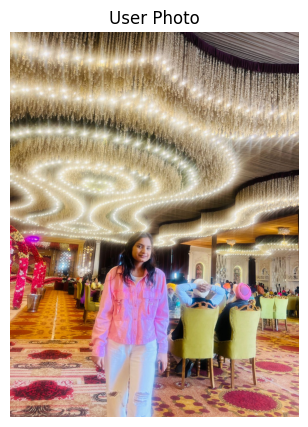

Describe the type of clothing you want to try (e.g., 'casual summer outfit'): belt dress
AI Clothing Suggestion: A belt dress, also known as a belted dress, is a type of dress that features a belt or sash that cinches at the waist. The belt can be made of various materials, such as leather, fabric, or elastic, and is often used to accentuate the wearer's figure and create a defined silhouette.

Belt dresses can be found in a wide range of styles, from casual to formal, and are suitable for various occasions. Some common features of belt dresses include:

1. **Fitted waist**: The belt helps to create a defined waistline, which can be flattering on many body types.
2. **Accentuated curves**: The belt can draw attention to the wearer's curves, making it a popular choice for those who want to emphasize their figure.
3. **Versatility**: Belt dresses can be dressed up or down, making them suitable for everything from everyday wear to formal events.
4. **Comfort**: Many belt dresses are desig

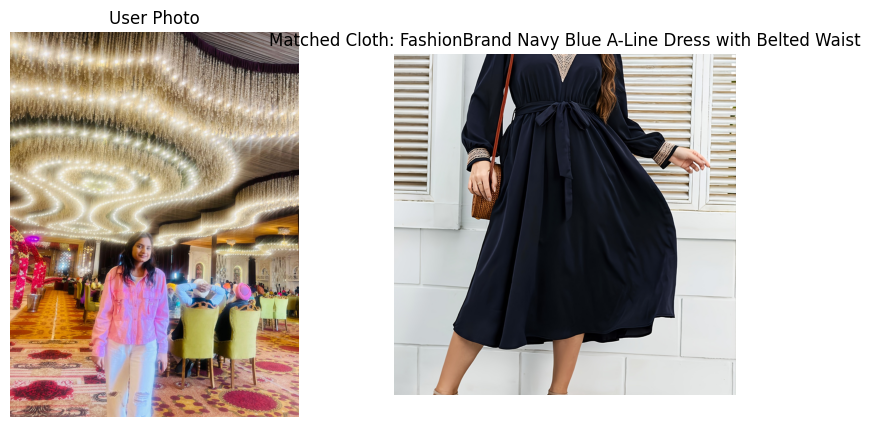

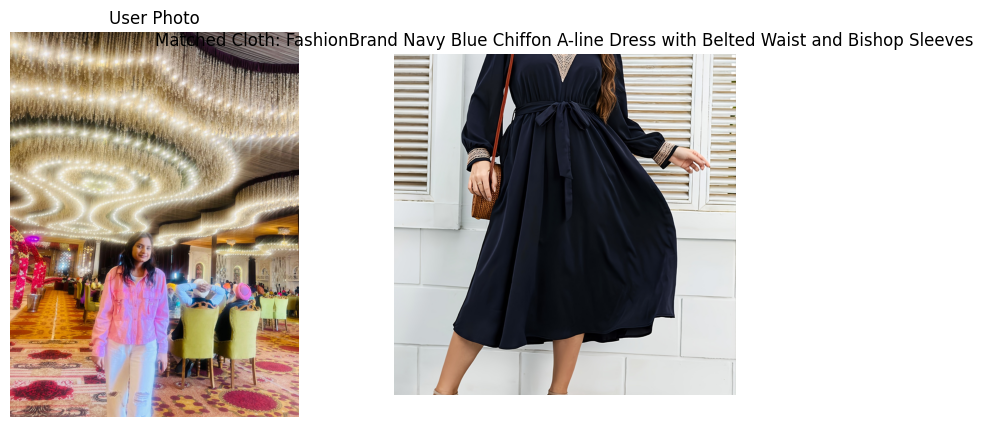

In [52]:
import os
import requests
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from groclake.cataloglake import CatalogLake

class AIFashionCatalogMatcher:
    def __init__(self):
        """Initialize Groclake and Groq credentials"""
        # Groclake Credentials
        os.environ['GROCLAKE_ACCOUNT_ID'] = "your_account_id"  # Replace with your Groclake account ID
        os.environ['GROCLAKE_API_KEY'] = "your_api_key"  # Replace with your Groclake API key

        self.cataloglake = CatalogLake()

        # Groq API Credentials
        self.GROQ_API_KEY = "your_groq_api_key"
        os.environ["GROQ_API_KEY"] = self.GROQ_API_KEY

    def get_clothing_suggestion(self, prompt):
        """Send prompt to Groq Cloud API for clothing suggestion"""
        url = "https://api.groq.com/openai/v1/chat/completions"
        headers = {
            "Authorization": f"Bearer {self.GROQ_API_KEY}",
            "Content-Type": "application/json"
        }
        data = {
            "model": "llama-3.3-70b-versatile",
            "messages": [{
                "role": "user",
                "content": prompt
            }]
        }

        try:
            response = requests.post(url, headers=headers, json=data)
            if response.status_code == 200:
                return response.json()["choices"][0]["message"]["content"].strip()
            else:
                return f"Error: {response.status_code}, {response.text}"
        except Exception as e:
            print(f"API Request Error: {e}")
            return None

    def fetch_matching_catalog_items(self, clothing_suggestion, num_items=10):
        """Fetch catalog items matching the AI suggestion"""
        # Fetch all catalog items
        all_items = self.fetch_catalog_items(num_items)

        # Filter items based on AI suggestion
        matched_items = self.match_items_with_suggestion(all_items, clothing_suggestion)

        return matched_items

    def fetch_catalog_items(self, num_items=10):
        """Fetch items from catalog"""
        last_items = []
        page_number = 1

        while len(last_items) < num_items:
            fetch_request = {
                "groc_item_id": "",
                "groc_category": "",
                "is_in_stock": "",
                "page_size": "100",
                "page_number": str(page_number)
            }

            try:
                response = self.cataloglake.fetch(fetch_request)
                items = response.get('items', [])

                if not items:
                    break

                for item in items:
                    try:
                        enriched_item = self._enrich_item_details(item)
                        last_items.append(enriched_item)

                        if len(last_items) >= num_items:
                            break

                    except Exception as e:
                        print(f"Error processing item {item.get('groc_item_id')}: {e}")

                page_number += 1

            except Exception as e:
                print(f"Error fetching page {page_number}: {e}")
                break

        return last_items[:num_items]

    def _enrich_item_details(self, item):
        """Enrich item with additional details"""
        inventory_details = self._fetch_inventory(item['groc_item_id'])
        price_details = self._fetch_price(item['groc_item_id'])

        return {
            'Item ID': item.get('groc_item_id', 'N/A'),
            'Name': item.get('name', 'N/A'),
            'Category': item.get('category', 'N/A'),
            'Description': item.get('description', 'N/A'),
            'Product Type': item.get('product_type', 'N/A'),
            'Quantity': inventory_details.get('qty', 'N/A'),
            'In Stock': inventory_details.get('is_in_stock', 'N/A'),
            'MRP': price_details.get('mrp', 'N/A'),
            'Sale Price': price_details.get('sale_price', 'N/A'),
            'Gender': item.get('attributes', {}).get('gender', 'N/A'),
            'Color': item.get('attributes', {}).get('colour', 'N/A'),
            'Season': item.get('attributes', {}).get('season', 'N/A'),
            'Image URL': item.get('images', ['N/A'])[0] if item.get('images') else 'N/A'
        }

    def _fetch_inventory(self, groc_item_id):
        """Fetch inventory details"""
        try:
            inventory_request = {"items": [{"groc_item_id": groc_item_id}]}
            inventory_data = self.cataloglake.fetch_inventory(inventory_request)
            return inventory_data.get('items', [{}])[0]
        except Exception as e:
            print(f"Error fetching inventory: {e}")
            return {}

    def _fetch_price(self, groc_item_id):
        """Fetch price details"""
        try:
            price_request = {"items": [{"groc_item_id": groc_item_id}]}
            price_data = self.cataloglake.fetch_price(price_request)
            return price_data.get('items', [{}])[0]
        except Exception as e:
            print(f"Error fetching price: {e}")
            return {}

    def match_items_with_suggestion(self, catalog_items, suggestion):
        """Match catalog items with AI suggestion using semantic similarity"""
        matched_items = []

        for item in catalog_items:
            # Create a comprehensive matching context
            match_context = f"{item['Name']} {item['Description']} {item['Category']} {item['Product Type']} {item['Gender']} {item['Color']}"

            # Use Groq API to determine similarity
            similarity_prompt = f"How similar is the following description to this suggestion? " \
                                f"Suggestion: {suggestion}\n" \
                                f"Description: {match_context}\n" \
                                f"Respond with a numerical similarity score from 0-100"

            try:
                similarity_score_str = self.get_clothing_suggestion(similarity_prompt)

                # Extract numerical similarity score
                try:
                    similarity_score = int(''.join(filter(str.isdigit, similarity_score_str)))
                except:
                    similarity_score = 0

                # Add items with decent similarity
                if similarity_score > 50:
                    matched_items.append({
                        'Similarity Score': similarity_score,
                        **item
                    })

            except Exception as e:
                print(f"Similarity check error: {e}")

        # Sort matched items by similarity score in descending order
        matched_items.sort(key=lambda x: x['Similarity Score'], reverse=True)

        return matched_items

    def download_image(self, image_url, filename):
        """Download image from URL"""
        try:
            response = requests.get(image_url)
            if response.status_code == 200:
                with open(filename, 'wb') as f:
                    f.write(response.content)
                return filename
            else:
                print(f"Failed to download image: {image_url}")
                return None
        except Exception as e:
            print(f"Image download error: {e}")
            return None

    def virtual_try_on_workflow(self):
        """Complete AI-powered virtual try-on workflow"""
        # Step 1: User Photo Upload
        print("Upload your photo:")
        uploaded = files.upload()
        user_image_path = list(uploaded.keys())[0]
        user_image = cv2.imread(user_image_path)
        user_image = cv2.cvtColor(user_image, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(5, 5))
        plt.title("User Photo")
        plt.imshow(user_image)
        plt.axis('off')
        plt.show()

        # Step 2: Get user's clothing description
        user_prompt = input("Describe the type of clothing you want to try (e.g., 'casual summer outfit'): ")

        # Step 3: Get clothing suggestion
        clothing_suggestion = self.get_clothing_suggestion(user_prompt)
        print(f"AI Clothing Suggestion: {clothing_suggestion}")

        # Step 4: Find matching catalog items
        matched_items = self.fetch_matching_catalog_items(clothing_suggestion)

        # Display matched items
        print("\nMatched Catalog Items:")
        for item in matched_items:
            print(f"Name: {item['Name']}")
            print(f"Similarity Score: {item.get('Similarity Score', 'N/A')}")
            print(f"Image URL: {item['Image URL']}")
            print("---")

        # Step 5: Virtual Try-On for top matches
        for idx, item in enumerate(matched_items[:3], 1):
            try:
                # Download cloth image
                cloth_image_path = self.download_image(item['Image URL'], f'cloth_{idx}.jpg')

                if cloth_image_path:
                    # Read and process cloth image
                    cloth_image = cv2.imread(cloth_image_path)
                    cloth_image = cv2.cvtColor(cloth_image, cv2.COLOR_BGR2RGB)

                    # Resize cloth image to match user image
                    cloth_resized = cv2.resize(cloth_image, (user_image.shape[1], user_image.shape[0]))

                    # Blend images
                    alpha = 0.5
                    try_on_image = cv2.addWeighted(user_image, 1 - alpha, cloth_resized, alpha, 0)

                    # Display results
                    plt.figure(figsize=(15, 5))
                    plt.subplot(1, 3, 1)
                    plt.title("User Photo")
                    plt.imshow(user_image)
                    plt.axis('off')

                    plt.subplot(1, 3, 2)
                    plt.title(f"Matched Cloth: {item['Name']}")
                    plt.imshow(cloth_image)
                    plt.axis('off')

                    # plt.subplot(1, 3, 3)
                    # plt.title("Virtual Try-On Result")
                    # plt.imshow(try_on_image)
                    # plt.axis('off')

                    plt.show()

            except Exception as e:
                print(f"Virtual try-on error for item {idx}: {e}")

def main():
    # Initialize the AI Fashion Catalog Matcher
    matcher = AIFashionCatalogMatcher()

    # Run the virtual try-on workflow
    matcher.virtual_try_on_workflow()

if __name__ == "__main__":
    main()

In [39]:
!pip install diffusers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [40]:
from diffusers import AutoPipelineForInpainting, AutoencoderKL
from diffusers.utils import load_image
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [41]:
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipeline = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", vae=vae, torch_dtype=torch.float16, variant="fp16", use_safetensors=True).to("cuda")
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="sdxl_models", weight_name="ip-adapter_sdxl.bin", low_cpu_mem_usage=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


ip-adapter_sdxl.bin:   0%|          | 0.00/703M [00:00<?, ?B/s]

sdxl_models/image_encoder/config.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.69G [00:00<?, ?B/s]

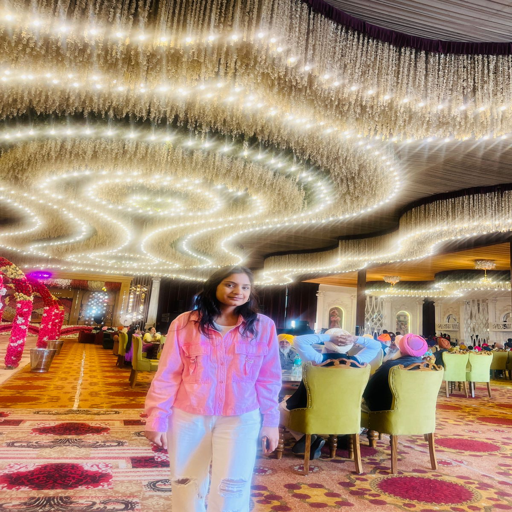

In [42]:
image = load_image('/content/prachi.jpeg').convert("RGB")
image.resize((512, 512))

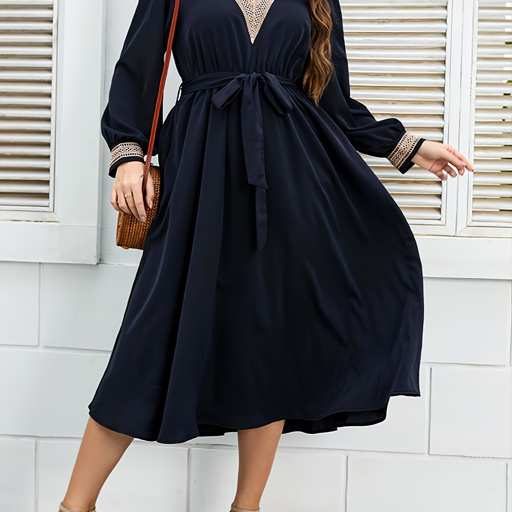

In [43]:
ip_image = load_image('/content/cloth_1.jpg').convert("RGB")
ip_image.resize((512, 512))

In [44]:
! git clone https://github.com/TonyAssi/Segment-Body.git
%cd /content/Segment-Body
! pip install -r requirements.txt
! cp ./SegBody.py ..
%cd ..

Cloning into 'Segment-Body'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 40 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 14.29 KiB | 3.57 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/Segment-Body
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 11.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 763.7 kB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1064899 sha

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 79824.24KB/s]
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:115: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


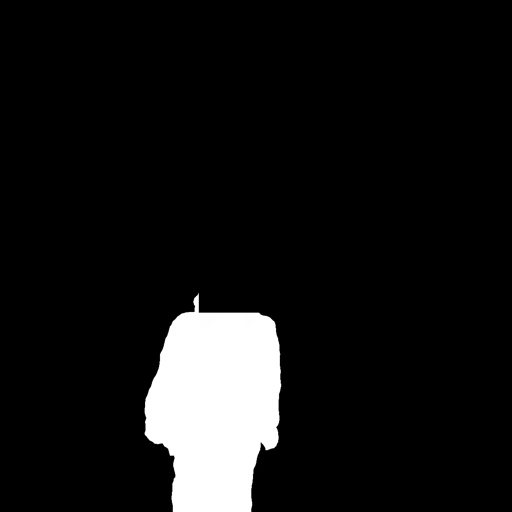

In [45]:
from SegBody import segment_body
seg_image, mask_image = segment_body(image, face=False)
mask_image.resize((512, 512))

  0%|          | 0/99 [00:00<?, ?it/s]

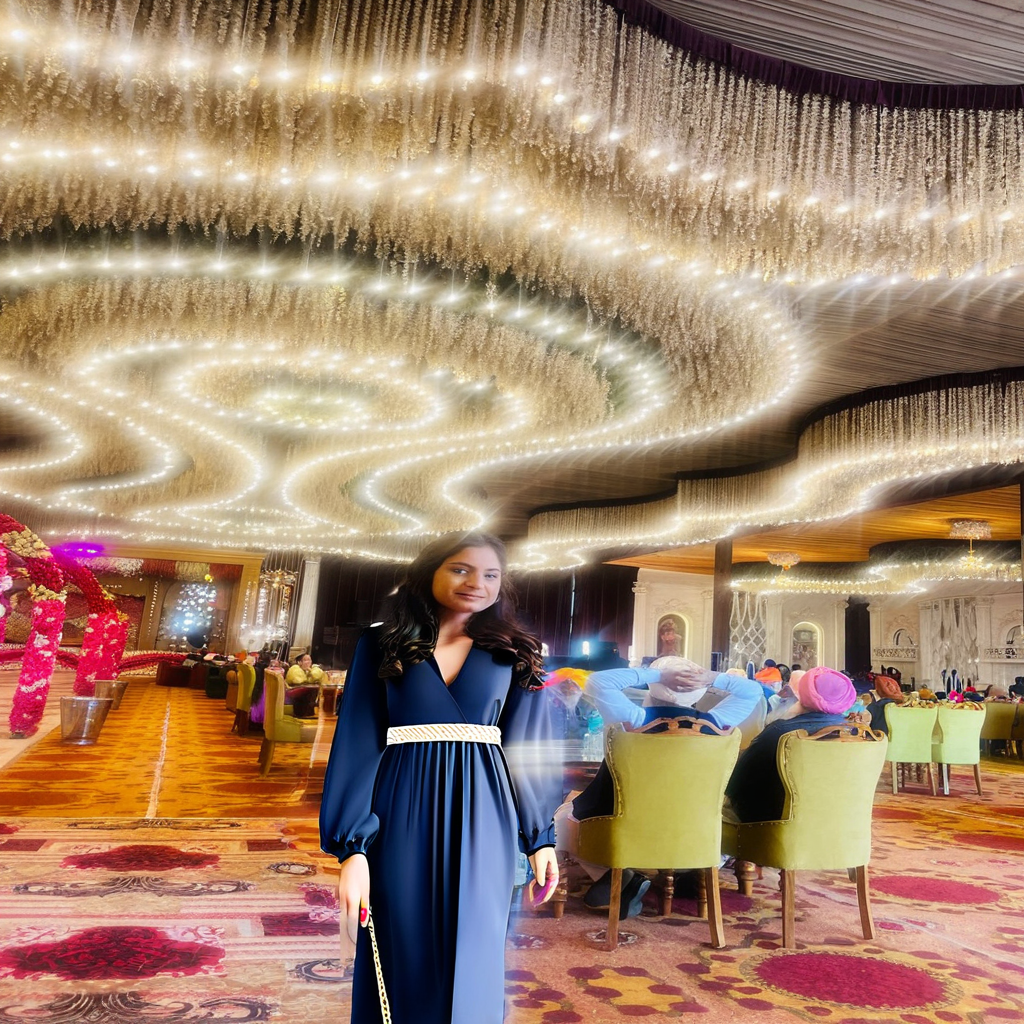

In [46]:
pipeline.set_ip_adapter_scale(1.0)
images = pipeline(
    prompt="photorealistic, perfect body, beautiful skin, realistic skin, natural skin",
    negative_prompt="ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings",
    image=image,
    mask_image=mask_image,
    ip_adapter_image=ip_image,
    strength=0.99,
    guidance_scale=7.5,
    num_inference_steps=100,
).images
images[0]

In [47]:
def virtual_try_on(img, clothing, prompt, negative_prompt, ip_scale=1.0, strength=0.99, guidance_scale=7.5, steps=100):
    _, mask_img = segment_body(img, face=False)
    pipeline.set_ip_adapter_scale(ip_scale)
    images = pipeline(
        prompt=prompt,
        negative_prompt=negative_prompt,
        image=img,
        mask_image=mask_img,
        ip_adapter_image=clothing,
        strength=strength,
        guidance_scale=guidance_scale,
        num_inference_steps=steps,
    ).images
    return images[0]

In [48]:
image = load_image('/content/prachi.jpeg').convert("RGB")
ip_image = load_image('/content/cloth_1.jpg').convert("RGB")

  0%|          | 0/99 [00:00<?, ?it/s]

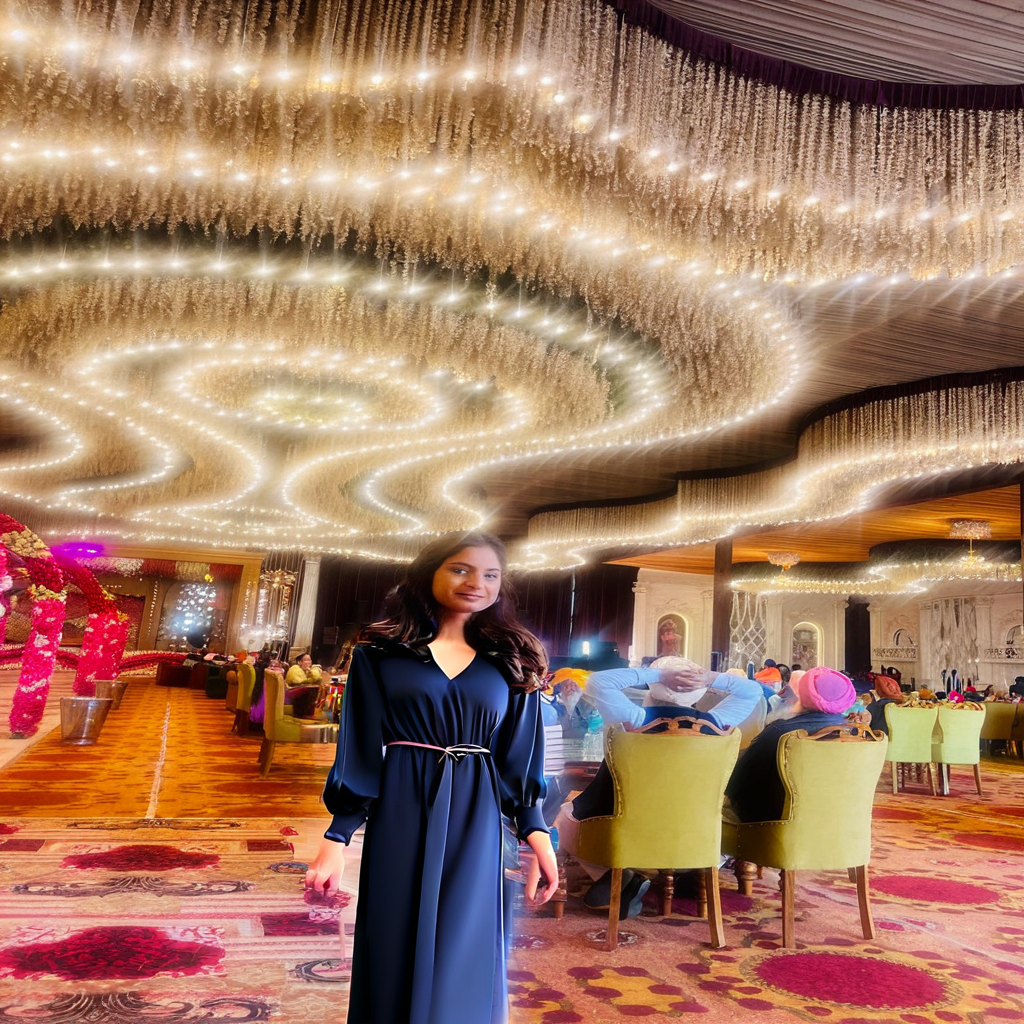

In [49]:
virtual_try_on(img=image,
               clothing=ip_image,
               prompt="photorealistic, perfect body, beautiful skin, realistic skin, natural skin",
               negative_prompt="ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings")

In [51]:
import os
import requests
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from groclake.cataloglake import CatalogLake
from PIL import Image, ImageDraw
from diffusers import StableDiffusionInpaintPipeline, IPAdapter, EulerAncestralDiscreteScheduler
import torch

def load_image(image_path):
    """Loads an image from a file path using PIL."""
    return Image.open(image_path).convert("RGB")

def segment_body(image, face=False):
    """
    Segments the body from an image.  This is a placeholder; replace with your
    actual segmentation implementation.

    Args:
        image (PIL.Image.Image): The input image.
        face (bool): Whether to include the face in the segmentation.

    Returns:
        tuple: A tuple containing the segmented image and the mask image.  The
               segmented image is the original image with the background set to
               transparent.  The mask image is a grayscale image where white
               pixels indicate the body and black pixels indicate the background.
    """
    # Placeholder implementation:  Creates a dummy mask.
    width, height = image.size
    mask_image = Image.new("L", (width, height), 0)  # Black background
    # Draw a white rectangle roughly where the body would be.  Adjust as needed.
    draw = ImageDraw.Draw(mask_image)
    draw.rectangle((width // 4, height // 4, width * 3 // 4, height * 3 // 4), fill=255)

    # Apply the mask to create the segmented image.
    segmented_image = Image.new("RGBA", image.size, (0, 0, 0, 0))  # Transparent background
    segmented_image.paste(image, mask=mask_image)

    return segmented_image, mask_image

class AIFashionCatalogMatcher:
    def __init__(self):
        """Initialize Groclake and Groq credentials"""
        # Groclake Credentials
        os.environ['GROCLAKE_ACCOUNT_ID'] = '002d6925f8c4522e8e188daed898d01e'
        os.environ['GROCLAKE_API_KEY'] = '2b44928ae11fb9384c4cf38708677c48'
        self.cataloglake = CatalogLake()

        # Groq API Credentials
        self.GROQ_API_KEY = "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"
        os.environ["GROQ_API_KEY"] = self.GROQ_API_KEY

        # Stable Diffusion Pipeline Initialization
        self.model_id = "stabilityai/stable-diffusion-2-inpainting"
        self.pipeline = StableDiffusionInpaintPipeline.from_pretrained(self.model_id, torch_dtype=torch.float16)
        self.pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(self.pipeline.scheduler.config)
        self.pipeline.to("cuda")

        # IP-Adapter Initialization
        self.ip_ckpt = "ip-adapter_sd15.bin"  # Verify path
        self.ip_model = IPAdapter(self.pipeline, ip_embed=None, device="cuda")
        self.ip_model.load_ip_adapter(self.ip_ckpt)
        self.pipeline.set_ip_adapter_scale(1.0)

    def get_clothing_suggestion(self, prompt):
        """Send prompt to Groq Cloud API for clothing suggestion"""
        url = "https://api.groq.com/openai/v1/chat/completions"
        headers = {
            "Authorization": f"Bearer {self.GROQ_API_KEY}",
            "Content-Type": "application/json"
        }
        data = {
            "model": "llama-3.3-70b-versatile",
            "messages": [{
                "role": "user",
                "content": prompt
            }]
        }

        try:
            response = requests.post(url, headers=headers, json=data)
            if response.status_code == 200:
                return response.json()["choices"][0]["message"]["content"].strip()
            else:
                return f"Error: {response.status_code}, {response.text}"
        except Exception as e:
            print(f"API Request Error: {e}")
            return None

    def fetch_matching_catalog_items(self, clothing_suggestion, num_items=10):
        """Fetch catalog items matching the AI suggestion"""
        # Fetch all catalog items
        all_items = self.fetch_catalog_items(num_items)

        # Filter items based on AI suggestion
        matched_items = self.match_items_with_suggestion(all_items, clothing_suggestion)

        return matched_items

    def fetch_catalog_items(self, num_items=10):
        """Fetch items from catalog"""
        last_items = []
        page_number = 1

        while len(last_items) < num_items:
            fetch_request = {
                "groc_item_id": "",
                "groc_category": "",
                "is_in_stock": "",
                "page_size": "100",
                "page_number": str(page_number)
            }

            try:
                response = self.cataloglake.fetch(fetch_request)
                items = response.get('items', [])

                if not items:
                    break

                for item in items:
                    try:
                        enriched_item = self._enrich_item_details(item)
                        last_items.append(enriched_item)

                        if len(last_items) >= num_items:
                            break

                    except Exception as e:
                        print(f"Error processing item {item.get('groc_item_id')}: {e}")

                page_number += 1

            except Exception as e:
                print(f"Error fetching page {page_number}: {e}")
                break

        return last_items[:num_items]

    def _enrich_item_details(self, item):
        """Enrich item with additional details"""
        inventory_details = self._fetch_inventory(item['groc_item_id'])
        price_details = self._fetch_price(item['groc_item_id'])

        return {
            'Item ID': item.get('groc_item_id', 'N/A'),
            'Name': item.get('name', 'N/A'),
            'Category': item.get('category', 'N/A'),
            'Description': item.get('description', 'N/A'),
            'Product Type': item.get('product_type', 'N/A'),
            'Quantity': inventory_details.get('qty', 'N/A'),
            'In Stock': inventory_details.get('is_in_stock', 'N/A'),
            'MRP': price_details.get('mrp', 'N/A'),
            'Sale Price': price_details.get('sale_price', 'N/A'),
            'Gender': item.get('attributes', {}).get('gender', 'N/A'),
            'Color': item.get('attributes', {}).get('colour', 'N/A'),
            'Season': item.get('attributes', {}).get('season', 'N/A'),
            'Image URL': item.get('images', ['N/A'])[0] if item.get('images') else 'N/A'
        }

    def _fetch_inventory(self, groc_item_id):
        """Fetch inventory details"""
        try:
            inventory_request = {"items": [{"groc_item_id": groc_item_id}]}
            inventory_data = self.cataloglake.fetch_inventory(inventory_request)
            return inventory_data.get('items', [{}])[0]
        except Exception as e:
            print(f"Error fetching inventory: {e}")
            return {}

    def _fetch_price(self, groc_item_id):
        """Fetch price details"""
        try:
            price_request = {"items": [{"groc_item_id": groc_item_id}]}
            price_data = self.cataloglake.fetch_price(price_request)
            return price_data.get('items', [{}])[0]
        except Exception as e:
            print(f"Error fetching price: {e}")
            return {}

    def match_items_with_suggestion(self, catalog_items, suggestion):
        """Match catalog items with AI suggestion using semantic similarity"""
        matched_items = []

        for item in catalog_items:
            # Create a comprehensive matching context
            match_context = f"{item['Name']} {item['Description']} {item['Category']} {item['Product Type']} {item['Gender']} {item['Color']}"

            # Use Groq API to determine similarity
            similarity_prompt = f"How similar is the following description to this suggestion? " \
                                f"Suggestion: {suggestion}\n" \
                                f"Description: {match_context}\n" \
                                f"Respond with a numerical similarity score from 0-100"

            try:
                similarity_score_str = self.get_clothing_suggestion(similarity_prompt)

                # Extract numerical similarity score
                try:
                    similarity_score = int(''.join(filter(str.isdigit, similarity_score_str)))
                except:
                    similarity_score = 0

                # Add items with decent similarity
                if similarity_score > 50:
                    matched_items.append({
                        'Similarity Score': similarity_score,
                        **item
                    })

            except Exception as e:
                print(f"Similarity check error: {e}")

        # Sort matched items by similarity score in descending order
        matched_items.sort(key=lambda x: x['Similarity Score'], reverse=True)

        return matched_items

    def download_image(self, image_url, filename):
        """Download image from URL"""
        try:
            response = requests.get(image_url)
            if response.status_code == 200:
                with open(filename, 'wb') as f:
                    f.write(response.content)
                return filename
            else:
                print(f"Failed to download image: {image_url}")
                return None
        except Exception as e:
            print(f"Image download error: {e}")
            return None

    def virtual_try_on_workflow(self):
        """Complete AI-powered virtual try-on workflow"""
        # Step 1: User Photo Upload
        print("Upload your photo:")
        uploaded = files.upload()
        user_image_path = list(uploaded.keys())[0]
        user_image_bgr = cv2.imread(user_image_path)
        user_image_rgb = cv2.cvtColor(user_image_bgr, cv2.COLOR_BGR2RGB)
        user_image_pil = Image.fromarray(user_image_rgb)  # Convert to PIL for segmentation

        plt.figure(figsize=(5, 5))
        plt.title("User Photo")
        plt.imshow(user_image_rgb)
        plt.axis('off')
        plt.show()

        # Step 2: Get user's clothing description
        user_prompt = input("Describe the type of clothing you want to try (e.g., 'casual summer outfit'): ")

        # Step 3: Get clothing suggestion
        clothing_suggestion = self.get_clothing_suggestion(user_prompt)
        print(f"AI Clothing Suggestion: {clothing_suggestion}")

        # Step 4: Find matching catalog items
        matched_items = self.fetch_matching_catalog_items(clothing_suggestion)

        # Display matched items
        print("\nMatched Catalog Items:")
        for item in matched_items:
            print(f"Name: {item['Name']}")
            print(f"Similarity Score: {item.get('Similarity Score', 'N/A')}")
            print(f"Image URL: {item['Image URL']}")
            print("---")

        # Step 5: Virtual Try-On for top matches
        for idx, item in enumerate(matched_items[:3], 1):
            try:
                # Download cloth image
                cloth_image_path = self.download_image(item['Image URL'], f'cloth_{idx}.jpg')

                if cloth_image_path:
                    # Read and process cloth image
                    cloth_image_bgr = cv2.imread(cloth_image_path)
                    cloth_image_rgb = cv2.cvtColor(cloth_image_bgr, cv2.COLOR_BGR2RGB)
                    cloth_image_pil = Image.fromarray(cloth_image_rgb) # Convert to PIL
                    cloth_image_resized = cloth_image_pil.resize((512,512)) # Resizing cloth image

                    # Body Segmentation
                    seg_image, mask_image = segment_body(user_image_pil, face=False) # Use PIL image
                    mask_image = mask_image.resize((512, 512)) # Resize mask

                    # Inpainting using Stable Diffusion
                    prompt = "photorealistic, perfect body, beautiful skin, realistic skin, natural skin, wearing " + item['Name']
                    negative_prompt = "ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings"

                    images = self.pipeline(
                        prompt=prompt,
                        negative_prompt=negative_prompt,
                        image=user_image_pil.resize((512,512)), #resized user image
                        mask_image=mask_image,
                        ip_adapter_image=cloth_image_resized,
                        strength=0.99,
                        guidance_scale=7.5,
                        num_inference_steps=100,
                    ).images

                    try_on_image = images[0] # Get the generated image

                    # Display results
                    plt.figure(figsize=(15, 5))
                    plt.subplot(1, 3, 1)
                    plt.title("User Photo")
                    plt.imshow(user_image_rgb)
                    plt.axis('off')

                    plt.subplot(1, 3, 2)
                    plt.title(f"Matched Cloth: {item['Name']}")
                    plt.imshow(cloth_image_rgb)
                    plt.axis('off')

                    plt.subplot(1, 3, 3)
                    plt.title("Virtual Try-On Result")
                    plt.imshow(try_on_image)
                    plt.axis('off')

                    plt.show()

            except Exception as e:
                print(f"Virtual try-on error for item {idx}: {e}")

def main():
    # Initialize the AI Fashion Catalog Matcher
    matcher = AIFashionCatalogMatcher()

    # Run the virtual try-on workflow
    matcher.virtual_try_on_workflow()

if __name__ == "__main__":
    main()


ImportError: cannot import name 'IPAdapter' from 'diffusers' (/usr/local/lib/python3.11/dist-packages/diffusers/__init__.py)